In [1]:
#import necessary libraries
import numpy as np  #linear algebra
import pandas as pd  #data processing
import matplotlib.pyplot as plt #plots
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS #visualizing texts

In [4]:
#read in the data
df = pd.read_csv('dataset.csv')

#make a copy of the data so as not to destroy the original
train = df.copy()

In [5]:
print('train: ', train.shape)
#(rows, columns)

train:  (20800, 5)


In [6]:
train.info() #check for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
train.head()   #a view of the data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
#fill null rows with empty string
train = train.fillna(' ')

In [9]:
#let's combine both the title and text together 
train['news'] = train['title']+' '+train['text']

In [10]:
train.label.value_counts()
#1: unreliable (fake)
#0: reliable (real)

1    10413
0    10387
Name: label, dtype: int64

#### let's visualize common words in the text

##### i will be using word cloud for the visualization
- word cloud creates a v

In [11]:
real = train[train['label'] == 0]   #dataframe for text labelled real news
fake = train[train['label'] == 1]   #dataframe for text labelled fake news

In [12]:
#function to plot wordcloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis('off')

In [13]:
comment_words = ''
comment = ''
stopwords = set(STOPWORDS)

In [19]:
for val in real.news:
    val = str(val)
    token = val.split()
for i in range(len(token)):
    token[i] = token[i].lower()
comment += " ".join(token) + " "


In [23]:
for val in fake.news:
    val = str(val)
    token = val.split()
for i in range(len(token)):
    token[i] = token[i].lower()
    comment_words += " ".join(token) + " "

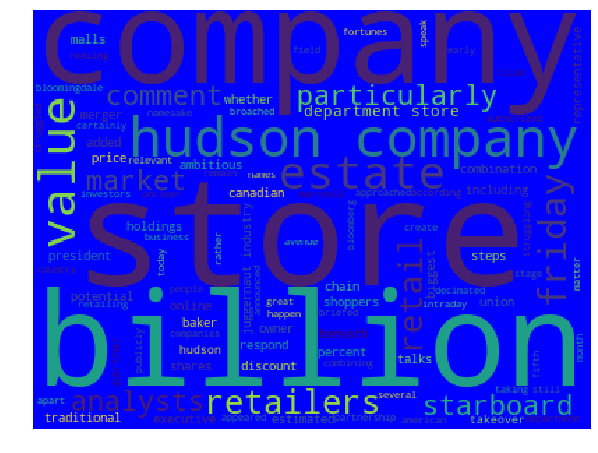

In [30]:
wordcloud = WordCloud(width = 400, height= 300,max_words = 100, min_word_length = 5,
                      stopwords=stopwords, background_color = 'blue', random_state = 42).generate(comment)
plot_cloud(wordcloud)

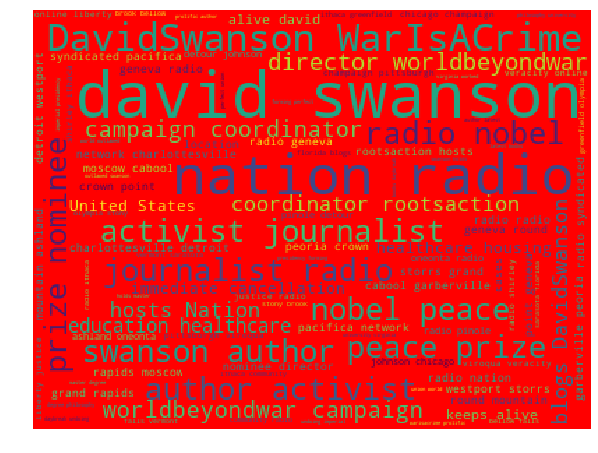

In [32]:
wordcloud = WordCloud(width = 400, height= 300,max_words = 100,  min_word_length = 5, background_color = 'red',
                      stopwords=stopwords, random_state = 42).generate(comment_words)
plot_cloud(wordcloud)

#### Model trainning

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [26]:
X = train['news']    #independent variable
y = train['label']   #dependent variable

In [33]:
#split to training and testing(20% of dataset) set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [34]:
ti_vec = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

In [35]:
tv_train = ti_vec.fit_transform(X_train)
tv_test = ti_vec.transform(X_test)

In [36]:
lr = LogisticRegression(C=1e5)
rfc = RandomForestClassifier(n_estimators=5)

In [37]:
lr.fit(tv_train, y_train)
rfc.fit(tv_train, y_train)

C:\Users\defaultuser0\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
lr_pred = lr.predict(tv_test)
rfc_pred = rfc.predict(tv_test)

#### Evaluate model on test set

In [40]:
score = accuracy_score(y_test, lr_pred)
score1 = accuracy_score(y_test, rfc_pred)

In [41]:
print('logistic regression: ', score)
print('random forest classifier: ', score1)

logistic regression:  0.9661057692307692
random forest classifier:  0.8242788461538462


In [42]:
err = confusion_matrix(y_test, lr_pred)
err1 = confusion_matrix(y_test, rfc_pred)

In [43]:
print('logistic regression: ')
print(err)

logistic regression: 
[[2065   67]
 [  74 1954]]


In [44]:
print('random forest classifier: ')
print(err1)

random forest classifier: 
[[1796  336]
 [ 395 1633]]
